<img src="https://www.arm.gov/wp-content/uploads/20250108_114808_500px-478x1024.jpg" style="width: 300px;" alt="BNF Instruments"></img>

# Surface Energy Balances from Tower Sites at BNF

## Imports

In [2]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as colors
import pandas as pd
import matplotlib.dates as mdates

## Download and Read Surface Energy Flux Datasets

In [3]:
# Set your username and token here!
username = 'mgrover4'
token = '176e1559b67be630'

startdate = '2025-02-07'
enddate = '2025-04-30T23:59:59'
# Set the datastream and start/enddates
datastream_sebs_s40 = 'bnfsebsS40.b1'
datastream_sebs_s30 = 'bnfsebsS30.b1'
datastream_sebs_s20 = 'bnfsebsS20.b1'
# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_sebs_s40 = act.discovery.download_arm_data(username, token, datastream_sebs_s40, startdate, enddate)
result_sebs_s30 = act.discovery.download_arm_data(username, token, datastream_sebs_s30, startdate, enddate)
result_sebs_s20 = act.discovery.download_arm_data(username, token, datastream_sebs_s20, startdate, enddate)

datastream_ecor_s40 = 'bnfecorsfS40.b1'
datastream_ecor_s30 = 'bnfecorsfS30.b1'
datastream_ecor_s20 = 'bnfecorsfS20.b1'

result_ecor_s40 = act.discovery.download_arm_data(username, token, datastream_ecor_s40, startdate, enddate)
result_ecor_s30 = act.discovery.download_arm_data(username, token, datastream_ecor_s30, startdate, enddate)
result_ecor_s20 = act.discovery.download_arm_data(username, token, datastream_ecor_s20, startdate, enddate)

datastream_sirs_s40 = 'bnfsirsS40.b1'
datastream_sirs_s30 = 'bnfsirsS30.b1'
datastream_sirs_s20 = 'bnfsirsS20.b1'

result_sirs_s40 = act.discovery.download_arm_data(username, token, datastream_sirs_s40, startdate, enddate)
result_sirs_s30 = act.discovery.download_arm_data(username, token, datastream_sirs_s30, startdate, enddate)
result_sirs_s20 = act.discovery.download_arm_data(username, token, datastream_sirs_s20, startdate, enddate)

[DOWNLOADING] bnfsebsS40.b1.20250207.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250208.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250209.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250210.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250211.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250212.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250213.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250214.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250215.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250216.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250217.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250218.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250219.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250220.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250221.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250222.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250223.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250224.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250225.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250226.000000.cdf
[DOWNLOADING] bnfsebsS40.b1.20250227.000

In [4]:
# Let's read in the data using ACT and check out the data
ds_sebs_s40 = act.io.read_arm_netcdf(result_sebs_s40)
ds_sebs_s30 = act.io.read_arm_netcdf(result_sebs_s30)
ds_sebs_s20 = act.io.read_arm_netcdf(result_sebs_s20)

ds_sebs_s40
ds_sebs_s30
ds_sebs_s20

<xarray.Dataset> Size: 1MB
Dimensions:                        (time: 3911, bound: 2)
Coordinates:
  * time                           (time) datetime64[ns] 31kB 2025-02-07 ... ...
Dimensions without coordinates: bound
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 31kB 2025-02-07 ... ...
    time_offset                    (time) datetime64[ns] 31kB 2025-02-07 ... ...
    time_bounds                    (time, bound) object 63kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    down_short_hemisp              (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    up_short_hemisp                (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage                (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                            (time) float32 16kB 34.65 34.65 ... 34.65
    lon                            (time) float32 16kB -87.29 -87.29 ... -87.29
    alt                            (time) float32 16kB 178.0 178.0 ... 178.0
Attributes: (12/33)
    command_line:            sebs_ingest -s bnf -f S20
    Conventions:             ARM-1.3
    process_version:         ingest-sebs-1.9-0.el7
    dod_version:             sebs-b1-1.6
    input_source:            /data/collection/bnf/bnfsebsS20.00/SEBS_Table30....
    site_id:                 bnf
    ...                      ...
    qc_bit_3_assessment:     Bad
    history:                 created by user dsmgr on machine prod-proc3.adc....
    _file_dates:             ['20250207', '20250208', '20250209', '20250210',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             bnfsebsS20.b1
    _arm_standards_flag:     1

In [5]:
#ECOR has sensible and latent heat flux together
ds_ecor_s40 = act.io.read_arm_netcdf(result_ecor_s40)
ds_ecor_s30 = act.io.read_arm_netcdf(result_ecor_s30)
ds_ecor_s20 = act.io.read_arm_netcdf(result_ecor_s20)

ds_ecor_s40
ds_ecor_s30
ds_ecor_s20

<xarray.Dataset> Size: 3MB
Dimensions:                                 (time: 3960, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 32kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 32kB 2025-0...
    time_offset                             (time) datetime64[ns] 32kB 2025-0...
    time_bounds                             (time, bound) object 63kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 32kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 32kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 16kB 34.65 ... 34.65
    lon                                     (time) float32 16kB -87.29 ... -8...
    alt                                     (time) float32 16kB 178.0 ... 178.0
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S20
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.3-0.el7
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS20.00/2025-02-06T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user dsmgr on machine prod-proc4.adc.ar...
    _file_dates:           ['20250207', '20250208', '20250209', '20250210', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS20.b1
    _arm_standards_flag:   1

In [6]:
# Let's read in the data using ACT and check out the data
ds_sirs_s40 = act.io.read_arm_netcdf(result_sirs_s40)
ds_sirs_s30 = act.io.read_arm_netcdf(result_sirs_s30)
ds_sirs_s20 = act.io.read_arm_netcdf(result_sirs_s20)

ds_sirs_s40
ds_sirs_s30
ds_sirs_s20

<xarray.Dataset> Size: 48MB
Dimensions:                                       (time: 119520, bound: 2)
Coordinates:
  * time                                          (time) datetime64[ns] 956kB ...
Dimensions without coordinates: bound
Data variables: (12/93)
    base_time                                     (time) datetime64[ns] 956kB ...
    time_offset                                   (time) datetime64[ns] 956kB ...
    time_bounds                                   (time, bound) object 2MB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    up_long_hemisp                                (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_up_long_hemisp                             (time) int32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1                             (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                                            ...
    qc_down_short_hemisp_vent_tachometer          (time) int32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1_netir                       (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp2_netir                       (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                                           (time) float32 478kB 34.65 ...
    lon                                           (time) float32 478kB -87.29...
    alt                                           (time) float32 478kB 178.0 ...
Attributes: (12/23)
    command_line:          mergerad2sirs -s bnf -f S20
    Conventions:           ARM-1.3
    process_version:       ingest-mergerad2sirs-1.0-0.el7
    dod_version:           sirs-b1-8.0
    input_datastreams:     bnfgndrad1sS20.a0 : 1.2 : 20250206.000000-20250207...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1475460
    history:               created by user dsmgr on machine prod-proc2.adc.ar...
    _file_dates:           ['20250207', '20250208', '20250209', '20250210', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfsirsS20.b1
    _arm_standards_flag:   1

### Apply Quality Control and Compute the Fluxes

In [7]:
ds_sirs_s40.clean.cleanup()
ds_sirs_s30.clean.cleanup()
ds_sirs_s20.clean.cleanup()

In [8]:
net_radiation_s40 = (ds_sirs_s40['down_long_hemisp1'] - ds_sirs_s40['up_long_hemisp']) + (ds_sirs_s40['down_short_hemisp'] - ds_sirs_s40['up_short_hemisp'])
net_radiation_s30 = (ds_sirs_s30['down_long_hemisp1'] - ds_sirs_s30['up_long_hemisp']) + (ds_sirs_s30['down_short_hemisp'] - ds_sirs_s30['up_short_hemisp'])
net_radiation_s20 = (ds_sirs_s20['down_long_hemisp1'] - ds_sirs_s20['up_long_hemisp']) + (ds_sirs_s20['down_short_hemisp'] - ds_sirs_s20['up_short_hemisp'])


Text(0, 0.5, 'Radiation')

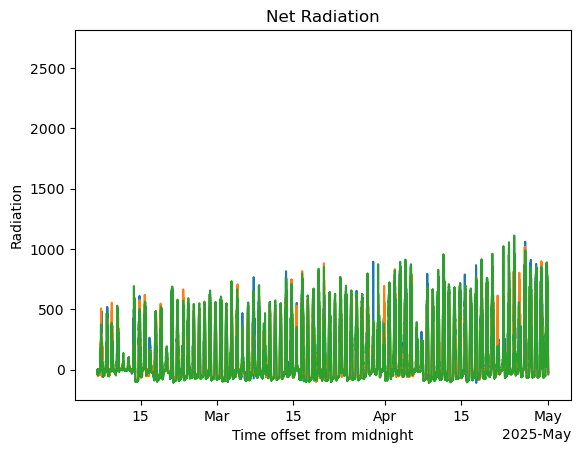

In [9]:
#net radiation calculations
net_radiation_s40.plot()
net_radiation_s30.plot()
net_radiation_s20.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

In [10]:
ds_sebs_s40.clean.cleanup()
ds_sebs_s30.clean.cleanup()
ds_sebs_s20.clean.cleanup()

In [11]:
avail_e_s40 = net_radiation_s40 - ds_sebs_s40['surface_soil_heat_flux_avg']
avail_e_s30 = net_radiation_s30 - ds_sebs_s30['surface_soil_heat_flux_avg']
avail_e_s20 = net_radiation_s20 - ds_sebs_s20['surface_soil_heat_flux_avg']

Text(0, 0.5, 'Radiation')

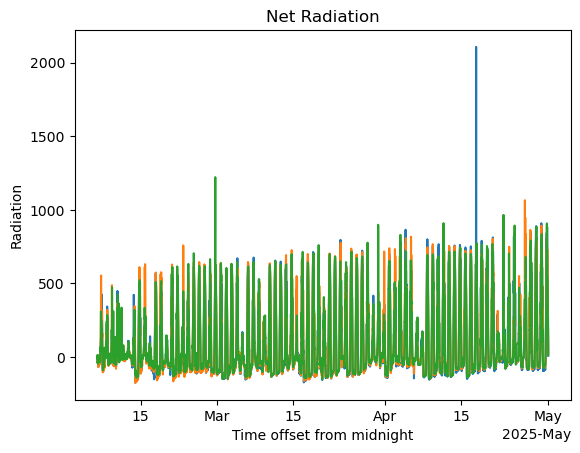

In [12]:
#net radiation calculations
avail_e_s40.plot()
avail_e_s30.plot()
avail_e_s20.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

In [13]:
ds_ecor_s40.clean.cleanup()
ds_ecor_s30.clean.cleanup()
ds_ecor_s20.clean.cleanup()

In [14]:
turb_flux_s40 = ds_ecor_s40['sensible_heat_flux'] + ds_ecor_s40['latent_flux']
turb_flux_s30 = ds_ecor_s30['sensible_heat_flux'] + ds_ecor_s30['latent_flux']
turb_flux_s20 = ds_ecor_s20['sensible_heat_flux'] + ds_ecor_s20['latent_flux']

Text(0, 0.5, 'Radiation')

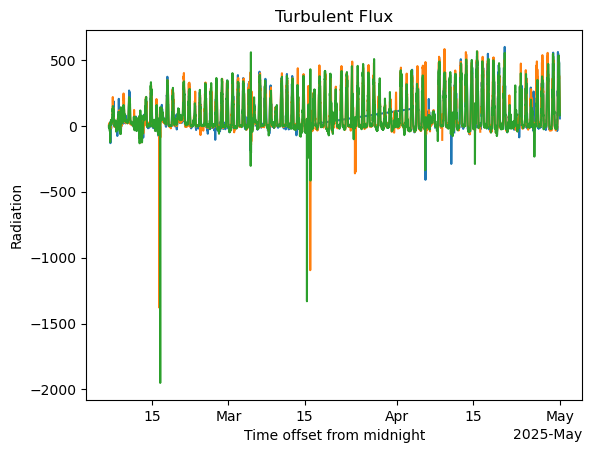

In [15]:
#net radiation calculations
turb_flux_s40.plot()
turb_flux_s30.plot()
turb_flux_s20.plot()
plt.title('Turbulent Flux')
plt.ylabel('Radiation')

In [16]:
turb_flux_aligned_s40, avail_e_aligned_s40 = xr.align(turb_flux_s40, avail_e_s40, join = 'inner')
turb_flux_aligned_s30, avail_e_aligned_s30 = xr.align(turb_flux_s40, avail_e_s30, join = 'inner')
turb_flux_aligned_s20, avail_e_aligned_s20 = xr.align(turb_flux_s40, avail_e_s20, join = 'inner')

## Compute and Plot Daily Energy Balance Using Xarray + Time Conversion

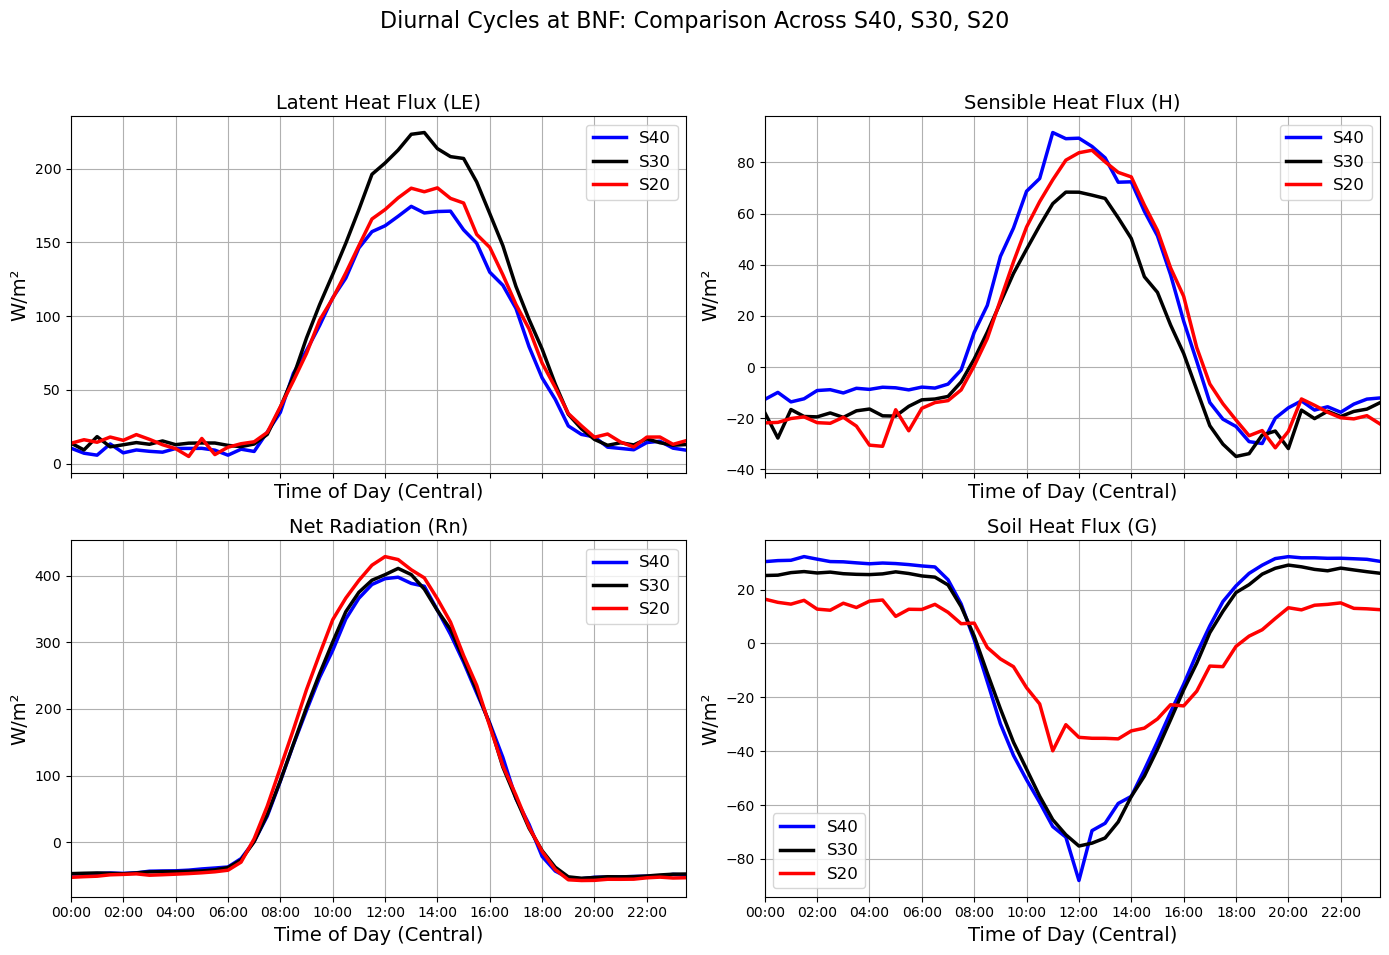

In [23]:
# --- Step 1: Timezone-aware time-of-day coordinate ---
def add_time_of_day(da):
    utc_times = pd.to_datetime(da.time.values).tz_localize('UTC')
    central_times = utc_times.tz_convert('US/Central')
    rounded = central_times.floor('30min')
    time_of_day_strs = xr.DataArray(rounded.strftime('%H:%M'), coords={'time': da.time}, dims='time')
    return da.assign_coords(time_of_day=time_of_day_strs)

# --- Step 2: Assign to each variable ---
le_td_s40 = add_time_of_day(ds_ecor_s40['latent_flux'])
le_td_s30 = add_time_of_day(ds_ecor_s30['latent_flux'])
le_td_s20 = add_time_of_day(ds_ecor_s20['latent_flux'])

h_td_s40  = add_time_of_day(ds_ecor_s40['sensible_heat_flux'])
h_td_s30  = add_time_of_day(ds_ecor_s30['sensible_heat_flux'])
h_td_s20  = add_time_of_day(ds_ecor_s20['sensible_heat_flux'])

rn_td_s40 = add_time_of_day(net_radiation_s40)
rn_td_s30 = add_time_of_day(net_radiation_s30)
rn_td_s20 = add_time_of_day(net_radiation_s20)

g_td_s40  = add_time_of_day(ds_sebs_s40['surface_soil_heat_flux_avg'])
g_td_s30  = add_time_of_day(ds_sebs_s30['surface_soil_heat_flux_avg'])
g_td_s20  = add_time_of_day(ds_sebs_s20['surface_soil_heat_flux_avg'])

# --- Step 3: Group by time-of-day and average ---
le_avg_s40 = le_td_s40.groupby('time_of_day').mean('time')
le_avg_s30 = le_td_s30.groupby('time_of_day').mean('time')
le_avg_s20 = le_td_s20.groupby('time_of_day').mean('time')

h_avg_s40  = h_td_s40.groupby('time_of_day').mean('time')
h_avg_s30  = h_td_s30.groupby('time_of_day').mean('time')
h_avg_s20  = h_td_s20.groupby('time_of_day').mean('time')

rn_avg_s40 = rn_td_s40.groupby('time_of_day').mean('time')
rn_avg_s30 = rn_td_s30.groupby('time_of_day').mean('time')
rn_avg_s20 = rn_td_s20.groupby('time_of_day').mean('time')

g_avg_s40  = g_td_s40.groupby('time_of_day').mean('time')
g_avg_s30  = g_td_s30.groupby('time_of_day').mean('time')
g_avg_s20  = g_td_s20.groupby('time_of_day').mean('time')

# --- Step 4: Sort by time ---
def sort_by_time(da):
    parsed = pd.to_datetime(da.time_of_day.values, format='%H:%M')
    sort_idx = np.argsort(parsed)
    return da.isel(time_of_day=sort_idx)

le_avg_s40 = sort_by_time(le_avg_s40)
le_avg_s30 = sort_by_time(le_avg_s30)
le_avg_s20 = sort_by_time(le_avg_s20)

h_avg_s40  = sort_by_time(h_avg_s40)
h_avg_s30  = sort_by_time(h_avg_s30)
h_avg_s20  = sort_by_time(h_avg_s20)

rn_avg_s40 = sort_by_time(rn_avg_s40)
rn_avg_s30 = sort_by_time(rn_avg_s30)
rn_avg_s20 = sort_by_time(rn_avg_s20)

g_avg_s40  = sort_by_time(g_avg_s40)
g_avg_s30  = sort_by_time(g_avg_s30)
g_avg_s20  = sort_by_time(g_avg_s20)

# --- Step 5: Prepare time axis ---
time_objects = pd.to_datetime(le_avg_s40.time_of_day.values, format='%H:%M')

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs = axs.flatten()

# Site styles: solid lines, different colors
site_styles = {
    'S40': {'color': 'blue',  'label': 'S40'},
    'S30': {'color': 'black', 'label': 'S30'},
    'S20': {'color': 'red',   'label': 'S20'}
}

lw = 2.5
x = time_objects

# LE
axs[0].plot(x, le_avg_s40.values, linestyle='-', linewidth=lw, **site_styles['S40'])
axs[0].plot(x, le_avg_s30.values, linestyle='-', linewidth=lw, **site_styles['S30'])
axs[0].plot(x, le_avg_s20.values, linestyle='-', linewidth=lw, **site_styles['S20'])
axs[0].set_title("Latent Heat Flux (LE)", fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# H
axs[1].plot(x, h_avg_s40.values, linestyle='-', linewidth=lw, **site_styles['S40'])
axs[1].plot(x, h_avg_s30.values, linestyle='-', linewidth=lw, **site_styles['S30'])
axs[1].plot(x, h_avg_s20.values, linestyle='-', linewidth=lw, **site_styles['S20'])
axs[1].set_title("Sensible Heat Flux (H)", fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Rn
axs[2].plot(x, rn_avg_s40.values, linestyle='-', linewidth=lw, **site_styles['S40'])
axs[2].plot(x, rn_avg_s30.values, linestyle='-', linewidth=lw, **site_styles['S30'])
axs[2].plot(x, rn_avg_s20.values, linestyle='-', linewidth=lw, **site_styles['S20'])
axs[2].set_title("Net Radiation (Rn)", fontsize=14)
axs[2].legend(fontsize=12)
axs[2].grid(True)

# G
axs[3].plot(x, g_avg_s40.values, linestyle='-', linewidth=lw, **site_styles['S40'])
axs[3].plot(x, g_avg_s30.values, linestyle='-', linewidth=lw, **site_styles['S30'])
axs[3].plot(x, g_avg_s20.values, linestyle='-', linewidth=lw, **site_styles['S20'])
axs[3].set_title("Soil Heat Flux (G)", fontsize=14)
axs[3].legend(fontsize=12)
axs[3].grid(True)

# Shared X-axis formatting
for ax in axs:
    ax.set_xlim([x[0], x[-1]])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.set_xlabel("Time of Day (Central)", fontsize=14)
    ax.set_ylabel("W/m²", fontsize=14)

plt.suptitle("Diurnal Cycles at BNF: Comparison Across S40, S30, S20", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
